In [17]:
import scipy.io
X = scipy.io.loadmat('feature.mat')
y = scipy.io.loadmat('label.mat')

X = X['feature']
y = y['label']

In [73]:
Y = map(lambda x: np.nonzero(x)[0][0], y)

In [71]:
X.shape

(1800, 5000)

In [72]:
y.shape

(1800, 6)

In [79]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=800)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(sum(pca.explained_variance_ratio_)))

explained variance ratio: 0.916865308343


In [93]:
from sklearn.model_selection import train_test_split

In [146]:
use_pca = False

if use_pca:
    X_train, X_test, Y_train, Y_test = train_test_split(X_r, Y, test_size=0.10)
else:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [124]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [118]:
# boosting (not work well, but should... so parameter problem)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features='sqrt'),
    n_estimators=2000,
    learning_rate=1.0)

bdt_real.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=2000, random_state=None)

In [119]:
# test error
real_test_errors = []
for real_test_predict in bdt_real.staged_predict(X_test):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, Y_test))

n_trees_real = len(bdt_real)

In [120]:
# train error
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]

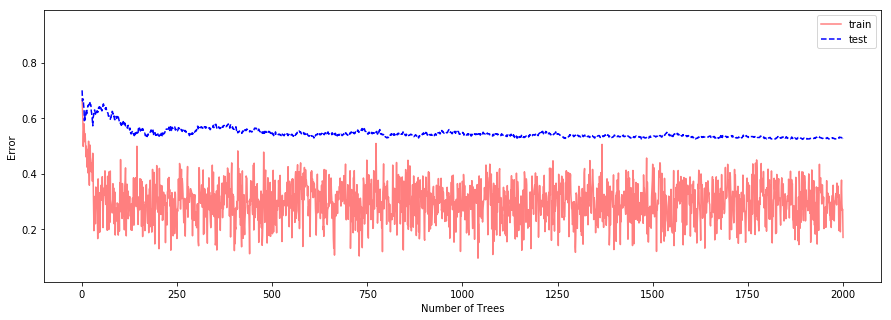

In [121]:
plt.figure(figsize=(15, 5))

plt.subplot(111)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='train', alpha=.5)
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='blue',
         linestyle='dashed', label='test')
plt.legend()
plt.ylim(0.01, 0.99)
plt.ylabel('Error')
plt.xlabel('Number of Trees')

plt.subplots_adjust(wspace=0.25)
plt.show()

In [122]:
confusion_matrix(Y_test, real_test_predict)

array([[40,  3,  1,  2,  0, 43],
       [ 0, 55,  5, 31,  0,  4],
       [ 0,  1, 30, 62,  0, 17],
       [ 0,  0, 20, 67,  0,  6],
       [ 4,  0,  0,  2, 51, 52],
       [ 0,  0, 11, 48,  0, 39]])

In [179]:
# random forest
rf = RandomForestClassifier(max_depth=20, criterion='entropy', n_estimators=5000, n_jobs=-1,
                            max_features='auto', verbose=1, oob_score=True, min_samples_split=4)
rf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [180]:
# test accuracy
Y_pred = rf.predict(X_test)
accuracy_score(Y_pred, Y_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed:    1.2s finished


0.73888888888888893

In [181]:
# train accuracy
accuracy_score(rf.predict(X_train), Y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed:    1.8s finished


1.0

In [182]:
confusion_matrix(Y_test, Y_pred)

array([[26,  0,  0,  0,  3,  0],
       [ 1, 26,  1,  3,  0,  0],
       [ 0,  1, 24,  5,  0,  4],
       [ 0,  3,  6, 16,  0,  2],
       [ 0,  0,  0,  0, 28,  0],
       [ 1,  0,  9,  5,  3, 13]])

In [183]:
rf.oob_score_

0.71111111111111114